<a href="https://colab.research.google.com/github/macorony/Python-ML-60-day-Journey/blob/main/Week1/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Day1 (2022-01-23)

In [ ]:
!pip install mglearn


In [ ]:
import mglearn
import numpy as np
import pandas as pd
from scipy import sparse # The most important part of scipy is sparse providing sparse matrices.
import matplotlib.pyplot as plt
%matplotlib inline  
# Render a figure in the notebook rather than display a object. 
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


In [ ]:
# load dataset of iris
from sklearn.datasets import load_iris
from sklearn.model_selection import ParameterGrid, StratifiedKFold
iris = load_iris()


In [ ]:
param_grid = [{'kernel': ['rbf'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'kernel': ['linear'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(param_grid)

[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    for training_samples, test_samples in outer_cv.split(X, y):
        # find the best parameter using inner cross-validation
        best_parameter = {}
        best_score = -np.inf
        # iterate over parameters
        for parameter in parameter_grid:
            # accumulate score over inner splits
            cv_scores =[]
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = classifier(**parameter)
                clf.fit(X[inner_train], y[inner_train])
                # evalueate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remembre parameters
                best_score = mean_score
                best_params = parameter
        clf = classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)
                

In [ ]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

In [ ]:
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


### Day2(2022-01-24) 
### Metric for Binary Classification
Often, accuracy is not a good measurement for model evaluation. for example, we develop a early cancer screening test indicating either positive or negative results. The positive means the presence of cancer and need additional test while the negative means the patient free of cancer. In this case, the accuracy is not a reliable measurement as accuracy is the total number of correct predictions divided by the number all samples. Think a little bit further, American Institute for Cancer Research report that at the global the age-standardised rate for all cancer combined was 197.9 per 100,000 in 2018, close to 0.2%. Cancer Occurrence is still a rare event. That brings a challenging fact that the predictive model has to consider the unbalance between positive and negative outcome. It is obvious that the negative result will dominate the screening test. In the extreme case, we can cunningly label all the test as negative and the accuracy can still be impressively 99.8%. Let's take an example how an unbalanced data can achieve a impressive accuracy scheme.  

In [ ]:
# modules input
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [ ]:
# input data
# we can design a dataset, temporarily use digits as an example 
digit_data = load_digits()
print(f'The dimension of input variable: {digit_data.data.shape}')
print(f'The dimension of target variable: {digit_data.target.shape}')


The dimension of input variable: (1797, 64)
The dimension of target variable: (1797,)


In [ ]:
y =  digit_data.target == 9
X_train, X_test, y_train, y_test = train_test_split(digit_data.data, y, random_state=1)
# DummyClassifier makes predication regardless of input features. 
# It serves as a simple and nonsense base line compared against other meaningful models.
# to apply cross-validation and grid search method in future
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_outcome = dummy_majority.predict(X_test)
print(f'Test score: {dummy_majority.score(X_test, y_test)}')

Test score: 0.8933333333333333


The accuracy score strongly indicates that how meaningless to use accuracy to measure model performance. What DummyClassifier did is just to predict most frequent event like we label all the cancer screening test as negative. because the negative events take up unbalanced high percentage in the total event, we can safely and easily get a lot of right prediction at very low cost of false prediction. The accuracy only measuring total correct predictions and it take take advantage of the unbalanced data achieving high accuracy.   

### Day3 (2022-01-25)
### Confusion Matrix

In [ ]:
# module input 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test, pred_outcome))

[[402   0]
 [ 48   0]]


In [ ]:
print(f1_score(y_test, pred_outcome))

0.0


In [ ]:
print(classification_report(y_test, pred_outcome))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       402
        True       0.00      0.00      0.00        48

    accuracy                           0.89       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.89      0.84       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from mglearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=(400,50), centers=2, cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



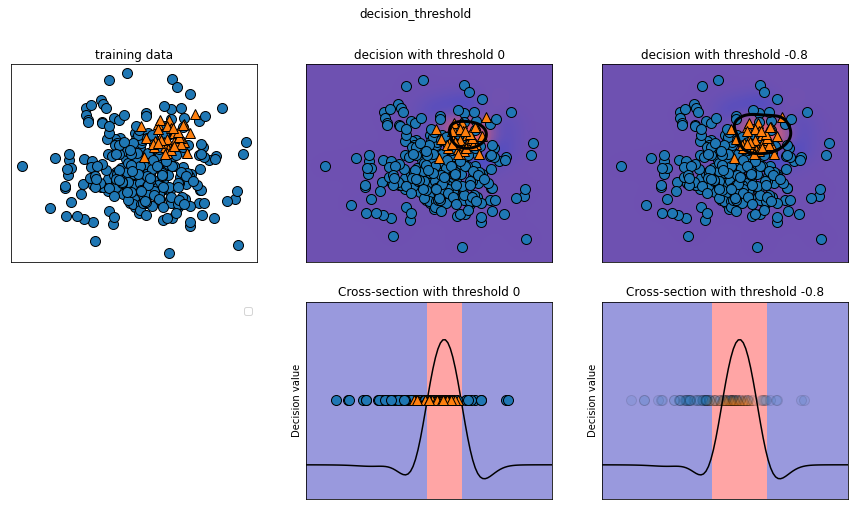

In [ ]:
mglearn.plots.plot_decision_threshold()

### Day4 (2022-01-26)
### Decision Function
Decision function is a method present in classifier (SVC, Logistic Regression) class of sklearn machine learning framework. This method basically returns a Numpy array, in which each element represents whether a predicted sample for x_test by the classifier lies to the right or left side of the hyperplane and also how far from the hyperplane

In [ ]:
# A code example from https://www.geeksforgeeks.org/ml-decision-function/
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.array([[2, 1.5], [-2, -1], [-1, -1], [2, 1], [1, 5], [0.5, 0.5], [-2, 0.5]])
y = np.array([0, 0, 1, 1, 1, 1, 0])

In [ ]:
x_train, x_test = x[0:4], x[4:] 
y_train, y_test = y[0:4], y[4:]

Text(0.5, 1.0, 'Created Data')

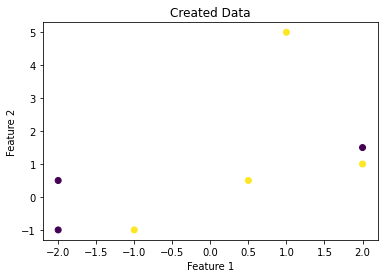

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Created Data')

In [ ]:
from sklearn.svm import SVC
clf = SVC()

In [ ]:
clf.fit(x_train, y_train)

SVC()

In [ ]:
# predict test set
predict = clf.predict(x_test)
print('Predicted values from classifier:', predict)
print('Actual output is:', y_test)
print('Accuracy of the model is:', clf.score(x_test, y_test))

Predicted values from classifier: [0 1 0]
Actual output is: [1 1 0]
Accuracy of the model is: 0.6666666666666666


In [ ]:
# using decision function method present in svc class
decision_function = clf.decision_function(x_test)
print('Output of decision function is:', decision_function)
print('Prediction for x_test from classifier is:', predict)

Output of decision function is: [-0.04274893  0.29143233 -0.13001369]
Prediction for x_test from classifier is: [0 1 0]


In [ ]:
# plot the decision boudary
arr1 = np.arange(x[:, 0].min()-1, x[:, 0].max()+1, 0.01)
arr2 = np.arange(x[:, 1].min()-1, x[:, 1].max()+1, 0.01)
xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = clf.predict(input_array)

Text(0.5, 1.0, 'Decision Boundary')

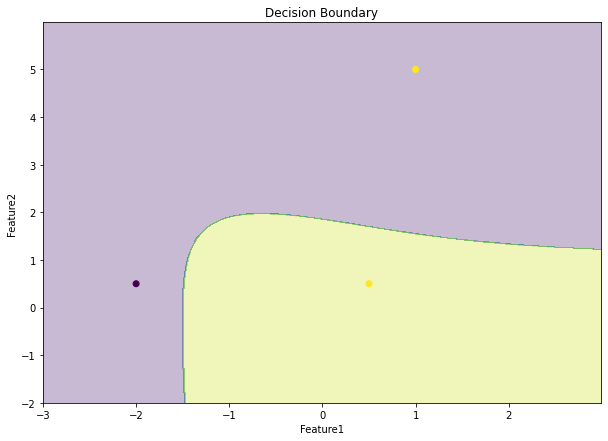

In [ ]:
plt.figure(figsize = (10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.3)
plt.scatter(x_test[:, 0], x_test[:,1], c = y_test.ravel(), alpha = 1)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary')

### Day5 (2022-01-27)
### Precision-recall curves and ROC curves

### Decision threshold
sklearn does not let us set the decision threshold directly, but it gives the access to decision scores that is used to make the prediction. We can select the best score from decision function output and set it as **Decision Threshold** value and consider all those decision score values which are less than this Decision Threshold as a negative class (0) and all those decision score values that are greater than this decision threshold value as a positive class (1).
Using **Precison-Recall Curve** for various decision threshold values, we can select the best value for decision threshold such that it gives High Precision or High Recall based on whether our object is precision-oriented or recall-oriented respectively

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
# precision_recall_curve is the function to compute precision-recall-pairs for different probability thresholds
# example code indicating how the function works
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(precision)
print(recall)
print(thresholds)

[0.66666667 0.5        1.         1.        ]
[1.  0.5 0.5 0. ]
[0.35 0.4  0.8 ]


In [ ]:
X, y = make_blobs(n_samples=(4000, 5000), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# find threshold closest to zero, the default threshold for decision_function
# a trade-off that is chosen when calling the predict method
close_zero = np.argmin(np.abs(thresholds))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
precision[close_zero], recall[close_zero], thresholds[close_zero]

(0.8855291576673866, 0.9863672814755413, 0.011036142482385936)

Text(0, 0.5, 'recall')

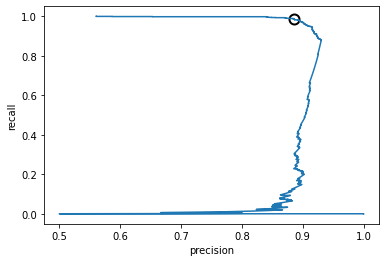

In [ ]:
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero',
         fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')

The curve starts at the top-left corner, corresponding to very low threshold, classifying everything as the positive class. Raising the threshold moves the curve toward higher precision, but lower recall. Raising the threshold more and more, we get to a situation where most of the points classified as being positive are true positive, leading to a very precision but lower recall. on the top left the curve is relative flat, meaning that recall does not go down a lot when we require increased precision.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

In [ ]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])


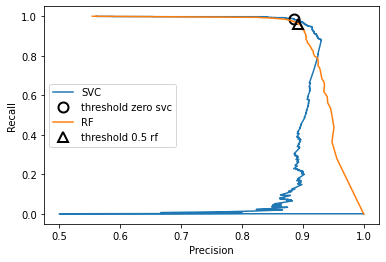

In [ ]:
plt.plot(precision, recall, label='SVC')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero svc', 
         fillstyle='none', c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf, recall_rf, label='RF')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')


### Day6 (2022-01-28)